In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from matplotlib.pyplot import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving front_new.csv to front_new (2).csv


In [ ]:
df = pd.read_csv('front_new.csv')

In [ ]:
df.head()

,Unnamed: 0,Student,Attempt Submission Time,Grades,Exam duration (Sec)
0,0,MUHAMMED FAIES,"Dec. 29, 2021, 11:16 a.m.",93.33,390
1,1,Sai Akshay,"Dec. 29, 2021, 9:09 a.m.",80.00,726
2,2,MUHAMMED NA,"Dec. 29, 2021, 4:55 a.m.",80.00,666
3,3,VINAYAK K,"Dec. 29, 2021, 4:03 a.m.",46.67,478
4,4,ANJALI ARORA,"Dec. 28, 2021, 5:09 p.m.",80.00,946


In [ ]:
km = KMeans(n_clusters = 4)
km

KMeans(n_clusters=4)

In [ ]:
y_predicted = km.fit_predict(df[['Grades','Exam duration (Sec)']])
df['cluster'] = y_predicted

In [ ]:
# get centroids
centroids = km.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#d9df20']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

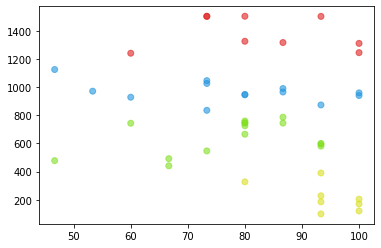

In [ ]:
plt.scatter(df['Grades'], df['Exam duration (Sec)'], c=df.c, alpha = 0.6)

In [ ]:
cen_x

[82.96222222222222, 77.778, 77.43538461538462, 94.16499999999999]

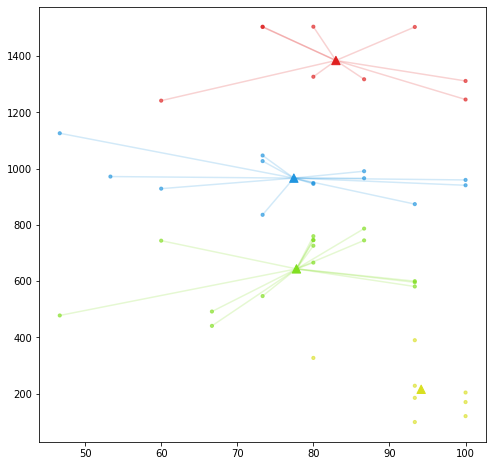

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
# plot data
plt.scatter(df['Grades'], df['Exam duration (Sec)'], c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Grades, val.cen_x]
    y = [val['Exam duration (Sec)'], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)

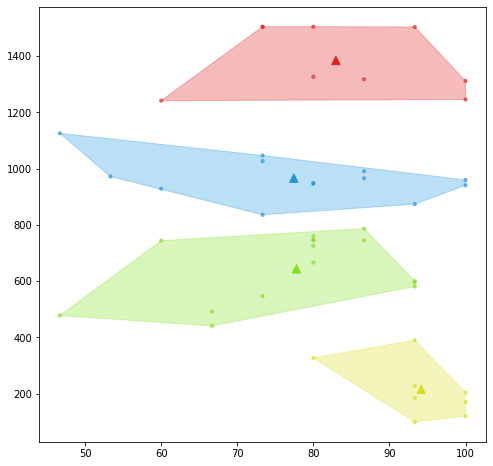

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df['Grades'], df['Exam duration (Sec)'], c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Grades', 'Exam duration (Sec)']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

#plt.xlim(0,200)
#plt.ylim(0,200)

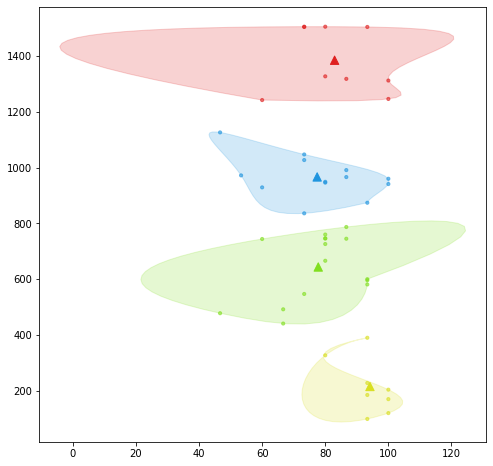

In [ ]:
import scipy.interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df['Grades'], df['Exam duration (Sec)'], c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Grades', 'Exam duration (Sec)']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])

    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = scipy.interpolate.splprep([x_hull, y_hull],
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = scipy.interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)

#p#lt.xlim(0,200)
#plt.ylim(0,200)